In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from figures_load_data import load_data_function
from matplotlib.colors import LogNorm
from scipy.interpolate import interp1d

# markers
marker_triple = 's'
marker_crit = 'o'
marker_exp_vle = '^'
marker_exp_sle = 'v'
marker_exp_sve = 'D'
markersize = 3.
linewidth_triple = 0.4
# Figure sizes
inTocm = 2.54
base_height = 5.  # cm
width_single_column = 8.  # cm
width_two_columns = 14.  # cm
width_three_columns = 17.  # cm
dpi = 400
format = 'pdf'
fontsize_annotation = 8

# figure style
plt.style.use('seaborn-v0_8-colorblind')
plt.style.use('./figures.mplstyle')

##############################
# folder to save the figures # 
##############################

folder_to_save = '../figures'
os.makedirs(folder_to_save, exist_ok=True)

In [2]:
# Reading the data for the figure
root_folder_to_read = "../computed_files"

# To  get the limits and folders correctly

folder_to_read_names = dict()
folder_to_read_names['argon'] = "1_1_argon"
folder_to_read_names['xenon'] = "1_2_xenon"
folder_to_read_names['krypton'] = "1_3_krypton"
folder_to_read_names['methane'] = "1_4_methane"
folder_to_read_names['nitrogen'] = "1_6_nitrogen"
folder_to_read_names['carbon_monoxide'] = "1_7_co"
folder_to_read_names['cf4'] = "1_8_cf4"


expdata_filenames = dict()
expdata_filenames['argon'] = "argon.xlsx"
expdata_filenames['xenon'] = "xenon.xlsx"
expdata_filenames['krypton'] = "krypton.xlsx"
expdata_filenames['methane'] = "methane.xlsx"
expdata_filenames['nitrogen'] = "nitrogen.xlsx"
expdata_filenames['carbon_monoxide'] = "carbon_monoxide.xlsx"
expdata_filenames['cf4'] = "cf4.xlsx"

component_names = dict()
component_names['argon'] = r"Ar"
component_names['xenon'] = r"Xe"
component_names['krypton'] = r"Kr"
component_names['methane'] = r"CH$_{4}$"
component_names['nitrogen'] = r"N$_{2}$"
component_names['carbon_monoxide'] =  r"CO"
component_names['cf4'] = r"CF$_{4}$"

phase_equilibria_limits = dict()
phase_equilibria_limits['argon'] = {'rho_lower': -1, 'rho_upper': 45, 'T_lower': 73, 'T_upper': 200, 'P_lower': 5e-3, 'P_upper': 1e3, 'H_upper': 9, 'markerevery_sve': 3}
phase_equilibria_limits['xenon'] = {'rho_lower': -1, 'rho_upper': 30, 'T_lower': 110, 'T_upper': 340, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 18, 'markerevery_sve': 1}
phase_equilibria_limits['krypton'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 100, 'T_upper': 260, 'P_lower': 5e-3, 'P_upper': 1e3, 'H_upper': 10, 'markerevery_sve': 3}
phase_equilibria_limits['methane'] = {'rho_lower': -1, 'rho_upper':35, 'T_lower': 80, 'T_upper': 240, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 12, 'markerevery_sve': 2}
phase_equilibria_limits['nitrogen'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 55, 'T_upper': 205, 'P_lower': 1e-3, 'P_upper': 5e3, 'H_upper': 8, 'markerevery_sve': 2}
phase_equilibria_limits['carbon_monoxide'] = {'rho_lower': -1, 'rho_upper': 40, 'T_lower': 60, 'T_upper': 160, 'P_lower': 1e-3, 'P_upper': 1e3, 'H_upper': 9, 'markerevery_sve': 2}
phase_equilibria_limits['cf4'] = {'rho_lower': -1, 'rho_upper': 25, 'T_lower': 80, 'T_upper': 300, 'P_lower': 1e-5, 'P_upper': 1e3, 'H_upper': 18, 'markerevery_sve': 1}

other_properties_limits = dict()
other_properties_limits['argon'] = {'T_lower': 73, 'T_upper': 160, 'diff_lower': 8e-10, 'diff_upper': 1e-4}
other_properties_limits['xenon'] = {'T_lower': 150, 'T_upper': 320, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['krypton'] = {'T_lower': 110, 'T_upper': 220, 'diff_lower': 8e-10, 'diff_upper': 5e-4}
other_properties_limits['methane'] = {'T_lower': 85, 'T_upper': 210, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['nitrogen'] = {'T_lower': 60, 'T_upper': 135, 'diff_lower': 1e-7, 'diff_upper': 1e-4}
other_properties_limits['carbon_monoxide'] = {'T_lower': 65, 'T_upper': 145, 'diff_lower': 1e-9, 'diff_upper': 1e-4}
other_properties_limits['cf4'] = {'T_lower': 80, 'T_upper': 280, 'diff_lower': 1e-10, 'diff_upper': 1e-6}

# what models to include in the figures
fluid_types = ['vle', 'vle_visc']
solid_types = ['vle_sle_sve', 'vle', 'vle_visc']

component_list = ['argon', 'krypton', 'xenon', 'nitrogen', 'carbon_monoxide', 'methane', 'cf4']
# component_list = ['cf4']
main_chapter = ['argon', 'nitrogen', 'methane', 'cf4']

In [3]:
expdata_excel_dict = dict()
data_dict_models = dict()
for component_name in component_list:
    folder_to_read = folder_to_read_names[component_name]
    expdata_filename = expdata_filenames[component_name]

    out = load_data_function(root_folder_to_read, folder_to_read, expdata_filename)
    ExpDataFile, dict_models = out

    expdata_excel_dict[component_name] = ExpDataFile
    data_dict_models[component_name] = dict_models

In [4]:
file_phase_solid = pd.ExcelFile('../computed_files/phase_equilibria_solid.xlsx')

# df_visc = pd.read_csv('../databases/mieparticle-visc.csv')
# df_visc = df_visc[df_visc['is_fluid']].reset_index(drop=True)
df_tcond = pd.read_csv('../databases/mieparticle-tcond.csv')
df_tcond = df_tcond[df_tcond['is_fluid']].reset_index(drop=True)

df_vle_md = pd.read_csv('../databases/mieparticle-vle.csv')

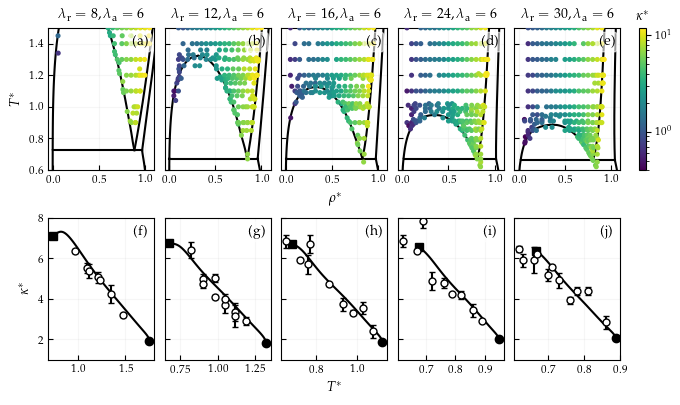

In [14]:
def tcond_model_test(file_phase_solid, df_tcond, df_vle_md,
                     height=2, width=3,
                     lrs = [8, 12, 16, 24, 28],
                     T_lower=0.6, T_upper=1.5,
                     rho_lower=-5e-2, rho_upper=1.1,
                     color_phase='k',
                     zorder=3, capsize=2, markersize=7.):

    df_tcond = df_tcond[df_tcond['T*'] <= T_upper].reset_index(drop=True)
    df_info = file_phase_solid.parse('info')
    df_vle = file_phase_solid.parse('vle')
    df_sle = file_phase_solid.parse('sle')
    df_sve = file_phase_solid.parse('sve')

    ########
    fig = plt.figure(figsize=(width, height), constrained_layout=True)

    gs = fig.add_gridspec(2, 5)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[0, 2])
    ax4 = fig.add_subplot(gs[0, 3])
    ax5 = fig.add_subplot(gs[0, 4])

    ax6 = fig.add_subplot(gs[1, 0])
    ax7 = fig.add_subplot(gs[1, 1])
    ax8 = fig.add_subplot(gs[1, 2])
    ax9 = fig.add_subplot(gs[1, 3])
    ax10 = fig.add_subplot(gs[1, 4])

    ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]
    labels = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)']
    bbox_labels = dict(facecolor='white',  edgecolor='white',  boxstyle='round,pad=0.2', alpha=0.6)
    for ax, label in zip(ax_list, labels):
        ax.tick_params(direction='in', which='both')
        ax.grid(True)
        ax.text(0.87, 0.9, label, transform=ax.transAxes, bbox=bbox_labels, zorder=zorder+1,
                horizontalalignment='center', verticalalignment='center')

    axts = [ax1, ax2, ax3, ax4, ax5]
    axbs = [ax6, ax7, ax8, ax9, ax10]

    for ax in axts[1:]:
        ax.tick_params(labelleft=False)
    for ax in axbs[1:]:
        ax.tick_params(labelleft=False)

    norm_tcond =LogNorm(vmin=0.4, vmax=12)
    for axt, axb, lambda_r in zip(axts, axbs, lrs):

        axt.set_title(f' $\lambda_\mathrm{{r}} = {lambda_r}, \lambda_\mathrm{{a}} = 6$')
        axt.set_ylim([T_lower, T_upper])
        axt.set_xlim([rho_lower, rho_upper])

        # Plotting phase equilibria
        df_vle_md_lr = df_vle_md[df_vle_md['lr'] == lambda_r]

        df_info_lr = df_info[df_info['lambda_r'] == lambda_r]
        df_vle_lr = df_vle[df_vle['lambda_r'] == lambda_r]
        df_sle_lr = df_sle[df_sle['lambda_r'] == lambda_r]
        df_sve_lr = df_sve[df_sve['lambda_r'] == lambda_r]

        axt.plot(df_info_lr[['rhovad_triple', 'rholad_triple', 'rhosad_triple']].values[0] , df_info_lr[['T_triple', 'T_triple','T_triple']].values[0], color=color_phase)
        # VLE
        axt.plot(df_vle_lr['rhov_vle_model'], df_vle_lr['T_vle_model'], color=color_phase)
        axt.plot(df_vle_lr['rhol_vle_model'], df_vle_lr['T_vle_model'], color=color_phase)
        # SLE
        axt.plot(df_sle_lr['rhol_sle_model'], df_sle_lr['T_sle_model'], color=color_phase)
        axt.plot(df_sle_lr['rhos_sle_model'], df_sle_lr['T_sle_model'], color=color_phase)
        # SVE
        axt.plot(df_sve_lr['rhov_sve_model'], df_sve_lr['T_sve_model'], color=color_phase)
        axt.plot(df_sve_lr['rhos_sve_model'], df_sve_lr['T_sve_model'], color=color_phase)

        # Thermal conductivity
        df_tcond_lr = df_tcond[df_tcond['lr'] == lambda_r]
        sc = axt.scatter(df_tcond_lr['rho*'], df_tcond_lr['T*'], c=df_tcond_lr['thermal_conductivity'], s=markersize, zorder=zorder,
                         cmap='viridis', norm=norm_tcond)

        ###############################
        # Thermal conductivity at VLE #
        ###############################
        # axb.set_xlim([0.6, 1.3])
        axb.set_ylim([1., 8.])

        vle_labels = []
        for rhol, Tvle in df_vle_md_lr[['rhol*', 'T*']].values:
            rhol = np.round(rhol, 6)
            Tvle = np.round(Tvle, 2)
            is_rho = df_tcond_lr['rho*'] == rhol
            is_T = df_tcond_lr['T*'] == Tvle
            is_vle = np.logical_and(is_rho, is_T)
            if np.any(is_vle):
                vle_labels.append(df_tcond_lr.index[is_vle])
        vle_labels = np.hstack(vle_labels)
        df_tcond_lr_vle = df_tcond_lr.loc[vle_labels]

        axb.errorbar(df_tcond_lr_vle['T*'], df_tcond_lr_vle['thermal_conductivity'], yerr=df_tcond_lr_vle['thermal_conductivity_std'],
                     fmt='o', color='k', markerfacecolor='white', capsize=capsize, markersize=markersize-2)
        axb.plot(df_vle_lr['T_vle_model'], df_vle_lr['tcondl_vle_model'], color='k')
        axb.plot(df_vle_lr['T_vle_model'].values[0],  df_vle_lr['tcondl_vle_model'].values[0], color='k', marker='s')
        axb.plot(df_vle_lr['T_vle_model'].values[-1],  df_vle_lr['tcondl_vle_model'].values[-1], color='k', marker='o')

    cbt = fig.colorbar(sc, ax=axts, orientation='vertical', fraction=0.02, pad=0.02)

    ax3.set_xlabel(r'$\rho^*$')
    ax1.set_ylabel(r'$T^*$')
    cbt.ax.set_title(r'$\kappa^*$')
    ax6.set_ylabel(r'$\kappa^*$')
    ax8.set_xlabel(r'$T^*$')
    return fig

lrs = [8, 12, 16, 24, 30]
T_lower = 0.6
T_upper = 1.5
rho_lower = -5e-2
rho_upper = 1.1

height = 2 * base_height / inTocm
width = width_three_columns / inTocm

fig = tcond_model_test(file_phase_solid, df_tcond, df_vle_md,
                       height=height, width=width, lrs=lrs,
                       T_lower=T_lower, T_upper=T_upper)
fig

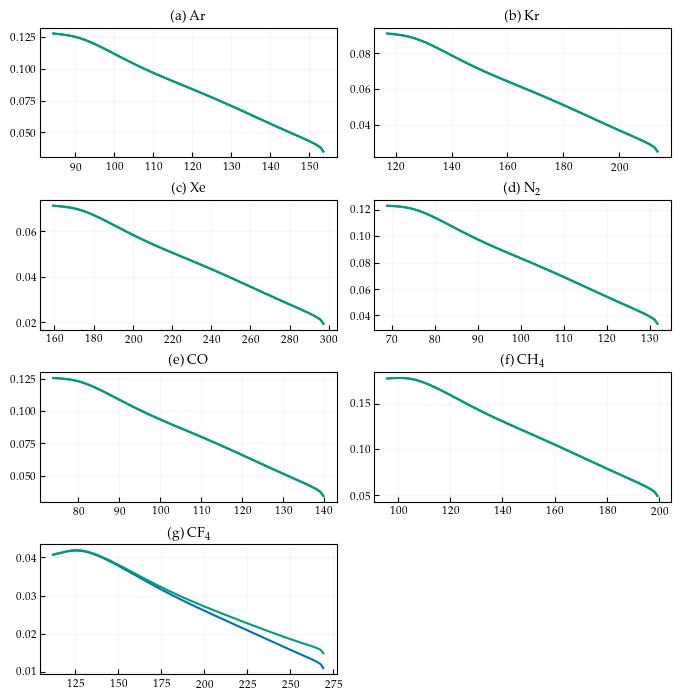

In [26]:
height = 3.5 * base_height / inTocm
width = width_three_columns / inTocm
markersize = 3.
fontsize_annotation = 8 

########

fig = plt.figure(figsize=(width, height), constrained_layout=True)
gs = fig.add_gridspec(4, 2)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])
ax7 = fig.add_subplot(gs[3, 0])
ax_list = [ax1, ax2, ax3, ax4, ax5, ax6, ax7]
for ax in ax_list:
    ax.tick_params(direction='in', which='both')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.grid(True)

dict_kwargs = dict()
dict_kwargs['vle'] = dict(linestyle='', color='C0', marker='s', label=r'OF$_1$')
dict_kwargs['vle_visc'] = dict(linestyle='', color='C2', marker='v', label=r'OF$_2$')
dict_kwargs['vle_sle_sve'] = dict(linestyle='', color='C1', marker='o', label=r'OF$_3$')

model_types = ['vle', 'vle_visc', 'vle_sle_sve'] 
title_list = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)', '(g)']

dict_kwargs = dict()
dict_kwargs['vle'] = dict(linestyle='', color='C0', marker='s', label=r'OF$_1$')
dict_kwargs['vle_visc'] = dict(linestyle='', color='C2', marker='v', label=r'OF$_2$')
dict_kwargs['vle_sle_sve'] = dict(linestyle='', color='C1', marker='o', label=r'OF$_3$')

for component_name, ax, title in zip(component_list, ax_list, title_list):
    # setting title
    ax.set_title(title + ' ' + component_names[component_name])

    dict_models = data_dict_models[component_name]   

    model_type = 'vle_sle_sve'
    df_vle = dict_models[f'{model_type}_solid_file'].parse('vle')

    ax.plot(df_vle['T_vle_model'], df_vle['tcondl_vle_model_ann'])
    ax.plot(df_vle['T_vle_model'], df_vle['tcondl_vle_model'])